# Combining datasets

We often want to combine datasets from different sources. We look at how to do this.

When **combining datasets** there are a few crucial concepts: 

1. **Concatenate (append)**: "stack" rows (observations) on top of each other. This works if the datasets have the same columns (variables).
2. **Merge**: the two datasets have different variables, but may or may not have the same observations. 

There are **different kinds of merges** depending on which observations you want to keep:

1. **Outer join**: Keep observations which are in *either* or in *both* datasets.
2. **Inner join**: Keep observations which are in *both* datasets. 
3. **Left join**: Keep observations which are in the *left* dataset. 

Keeping observations which are not in both datasets will result in **missing values** for the variables comming from the dataset, where the observation does not exist.

**Table of contents**<a id='toc0_'></a>    
- 1. [Concatenating datasets](#toc1_)    
- 2. [Merging datasets](#toc2_)    
- 3. [Inner join](#toc3_)    
- 4. [Left join](#toc4_)    
  - 4.1. [Alternative function for left joins: `df.join()` which uses the index](#toc4_1_)    
- 5. [Summary](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

For drawing venn diagrams:

In [1]:
#%pip install matplotlib-venn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

from matplotlib_venn import venn2

**Read data:**

In [3]:
RAS = pd.read_csv('data/RAS200.csv')
INDKP = pd.read_csv('data/INDKP101.csv')

## 1. <a id='toc1_'></a>[Concatenating datasets](#toc0_)

In [4]:
RAS.head(5)

,municipality,year,emp_rate,part_rate
0,Aabenraa,2008,74.6,76.3
1,Aabenraa,2009,71.6,75.2
2,Aabenraa,2010,70.9,74.5
3,Aabenraa,2011,70.2,74.0
4,Aabenraa,2012,69.5,73.7


Suppose we have two datasets that have the same variables, and we just want to concatenate them.

In [5]:
N = RAS.shape[0]

A = RAS.loc[RAS.index < N/2,:] # first half of observations
B = RAS.loc[RAS.index >= N/2,:] # second half of observations

print(f'A has shape {A.shape} ')
print(f'B has shape {B.shape} ')

A has shape (792, 4) 
B has shape (792, 4) 


**Concatenation** is done using the command `pd.concat([df1, df2])`. 

In [6]:
C = pd.concat([A,B])
print(f'{C.shape = } (same as the original {RAS.shape = })')

C.shape = (1584, 4) (same as the original RAS.shape = (1584, 4))


## 2. <a id='toc2_'></a>[Merging datasets](#toc0_)

Two datasets with **different variables**: `RAS` and `INDKP`. 

**Central command:** `pd.merge(RAS,INDKP, on=[municipalitiy, year], how=METHOD)`.  

1. The keyword `on` specifies the **merge key(s)**. They uniquely identify observations in both datasets (for sure in at least one of them).  

2. The keyword `how` specifies the **merge method** (taking values such as `'outer'`, `'inner'`, or `'left'`).

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)

**Look at datasets:**

In [7]:
print(f'Years in RAS: {RAS.year.unique()}')
print(f'Municipalities in RAS = {len(RAS.municipality.unique())}')
print(f'Years in INDKP: {INDKP.year.unique()}')
print(f'Municipalities in INDKP = {len(INDKP.municipality.unique())}')

Years in RAS: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023]
Municipalities in RAS = 99
Years in INDKP: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023]
Municipalities in INDKP = 98


**Find differences:**

In [8]:
diff_y = [y for y in INDKP.year.unique() if y not in RAS.year.unique()] 
print(f'years in INDKP data, but not in RAS data: {min(diff_y)} to {max(diff_y)}')
diff_m = [m for m in RAS.municipality.unique() if m not in INDKP.municipality.unique()] 
print(f'municipalities in RAS data, but not in INDKP data: {diff_m}')

years in INDKP data, but not in RAS data: 1987 to 2007
municipalities in RAS data, but not in INDKP data: ['Christiansø']


**Conclusion:** `INDKP` has more years than `RAS`, but `RAS` has one municipality that is not in `INDKP`. 

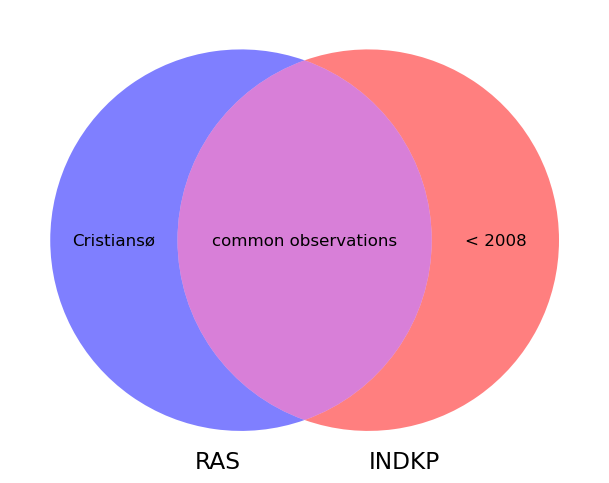

In [9]:
plt.figure(figsize=(8,6))

v = venn2(subsets=(5,5,7),set_labels=('RAS', 'INDKP'),set_colors=('blue','red'),alpha=0.5)
v.get_label_by_id('100').set_text('Cristiansø')
v.get_label_by_id('010').set_text('< 2008' )
v.get_label_by_id('110').set_text('common observations')

for text in v.subset_labels: text.set_fontsize(12)

## 3. <a id='toc3_'></a>[Inner join](#toc0_)

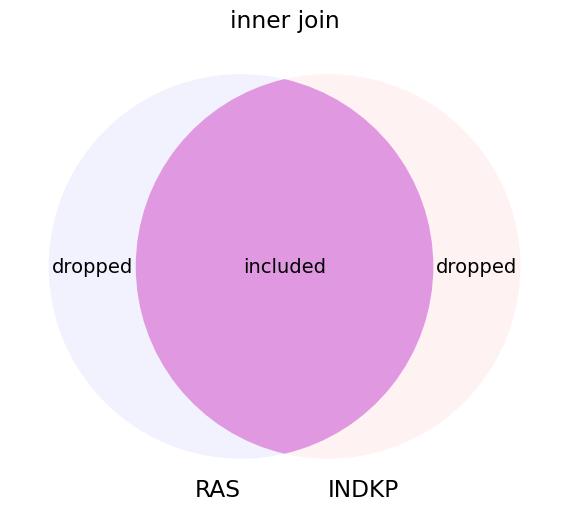

In [10]:
plt.figure(figsize=(8,6))
v = venn2(subsets=(4,4,10),set_labels=('RAS','INDKP'),set_colors=('blue','red'))
v.get_label_by_id('100').set_text('dropped');v.get_patch_by_id('100').set_alpha(0.05)
v.get_label_by_id('010').set_text('dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('included')
plt.title('inner join')
plt.show()

In [11]:
inner = pd.merge(RAS,INDKP,on=['municipality','year'],how='inner',validate='1:1')

print(f'Number of municipalities = {len(inner.municipality.unique())}')
print(f'Number of years          = {len(inner.year.unique())}')

Number of municipalities = 98
Number of years          = 16


We see that the **inner join** does not contain any rows that are not in both datasets. 

In [12]:
I = (inner.year.isin(diff_y)) | (inner.municipality.isin(diff_m))
inner.loc[I,:].head(15)

,municipality,year,emp_rate,part_rate,inc


Growth in employment rate and disposable income:

In [13]:
diff_emp_rate = inner.groupby('municipality').emp_rate.agg('first')-inner.groupby('municipality').emp_rate.agg('last')
first_inc = inner.groupby('municipality').inc.agg('first')
last_inc = inner.groupby('municipality').inc.agg('last')
diff_inc = (last_inc - first_inc) / first_inc * 100

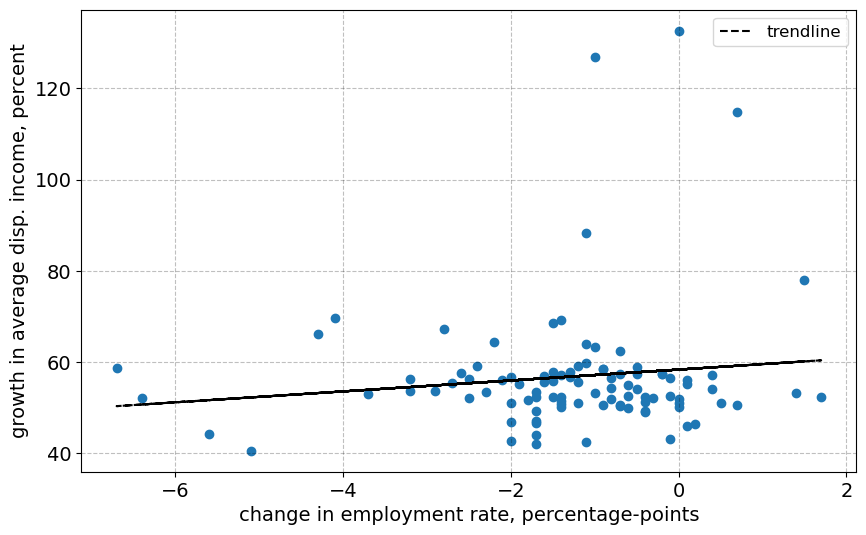

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.scatter(diff_emp_rate, diff_inc)

## add trendline
z = np.polyfit(diff_emp_rate, diff_inc, 1)
p = np.poly1d(z)
ax.plot(diff_emp_rate,p(diff_emp_rate),color='black',ls='--',label='trendline')

# labels
ax.set_xlabel('change in employment rate, percentage-points')
ax.set_ylabel('growth in average disp. income, percent')
ax.legend(frameon=True, fontsize=12);

## 4. <a id='toc4_'></a>[Left join](#toc0_)

It is very common to use **left join**. It is also known as a *many-to-one* join. 

* **Left dataset:** `inner` many observations of a given municipality (one per year),
* **Right dataset:** `area` at most one observation per municipality and new variable (km2). 

In [15]:
area = pd.read_csv('data/ARE207.csv')
area.head(5)

,municipality,area_2008
0,Aabenraa,941.55
1,Aalborg,1143.99
2,Aarhus,468.87
3,Albertslund,23.04
4,Allerød,67.44


In [16]:
inner_with_area = pd.merge(inner,area,on='municipality',how='left')
inner_with_area.head(10)

,municipality,year,emp_rate,part_rate,inc,area_2008
0,Aabenraa,2008,74.6,76.3,166290.0,941.55
1,Aabenraa,2009,71.6,75.2,167106.0,941.55
2,Aabenraa,2010,70.9,74.5,181280.0,941.55
3,Aabenraa,2011,70.2,74.0,184117.0,941.55
4,Aabenraa,2012,69.5,73.7,188090.0,941.55
5,Aabenraa,2013,69.4,73.4,191465.0,941.55
6,Aabenraa,2014,70.1,73.4,193579.0,941.55
7,Aabenraa,2015,70.7,73.7,198437.0,941.55
8,Aabenraa,2016,72.0,74.7,202029.0,941.55
9,Aabenraa,2017,72.9,75.5,210096.0,941.55


In [17]:
print(f'inner has shape {inner.shape}')
print(f'area has shape {area.shape}')
print(f'merge result has shape {inner_with_area.shape}')

inner has shape (1568, 5)
area has shape (99, 2)
merge result has shape (1568, 6)


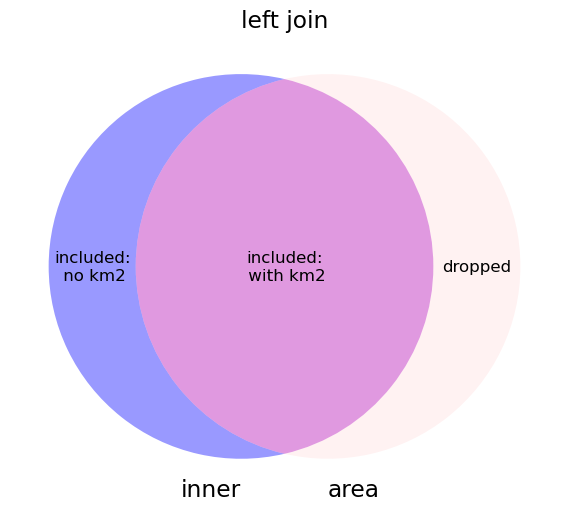

In [18]:
plt.figure(figsize=(8,6))
v = venn2(subsets=(4,4,10),set_labels=('inner', 'area'),set_colors=('blue','red'))
v.get_label_by_id('100').set_text('included:\n no km2'); 
v.get_label_by_id('010').set_text('dropped'); v.get_patch_by_id('010').set_alpha(0.05)
v.get_label_by_id('110').set_text('included:\n with km2')

# Set fontsize for the labels inside the circles
for text in v.subset_labels:
   text.set_fontsize(12)

plt.title('left join')
plt.show()

**Important:** Finding the non-overlapping observations

In [19]:
not_in_area = [m for m in inner.municipality.unique() if m not in area.municipality.unique()]
not_in_inner = [m for m in area.municipality.unique() if m not in inner.municipality.unique()]

print(f'There are {len(not_in_area)} municipalities in inner that are not in area. They are:')
print(not_in_area)
print('')

print(f'There is {len(not_in_inner)} municipalities in area that are not in inner. They are:')
print(not_in_inner)
print('')

There are 0 municipalities in inner that are not in area. They are:
[]

There is 1 municipalities in area that are not in inner. They are:
['Christiansø']



**Check that km2 is never missing:**

In [20]:
inner_with_area.area_2008.isna().sum()

np.int64(0)

**Is there a correlation between size of municipality and the employment rate?**

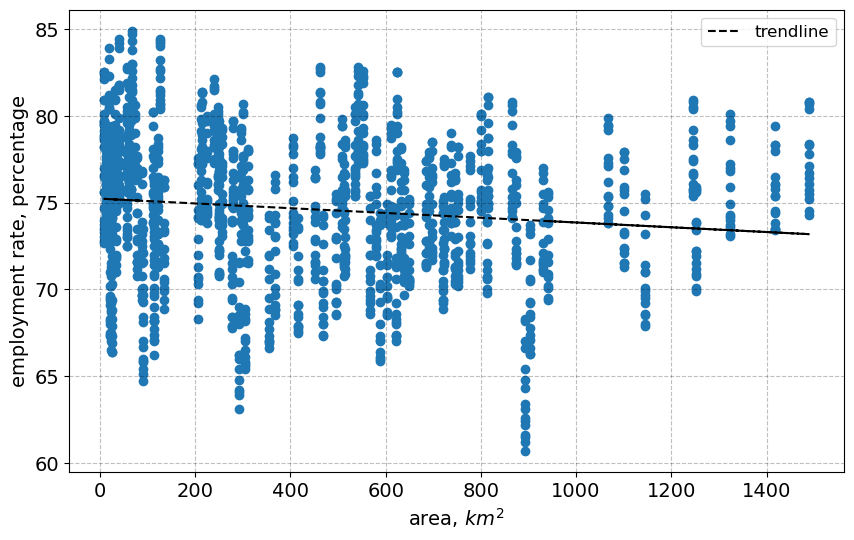

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

area_2008 = inner_with_area.area_2008
emp_rate = inner_with_area.emp_rate
ax.scatter(area_2008,emp_rate)

## add trendline
z = np.polyfit(area_2008,emp_rate, 1)
p = np.poly1d(z)
ax.plot(area_2008, p(area_2008),color='black',ls='--',label='trendline')

# labels
ax.set_xlabel('area, $km^2$')
ax.set_ylabel('employment rate, percentage')
ax.legend(frameon=True, fontsize=12);

### 4.1. <a id='toc4_1_'></a>[Alternative: `df.join()`](#toc0_)

To use a left join function `.join()`, we must first set the **index**. 

Technically, we do not need this, but if you ever need to join on more than one variable, `df.join()` requires you to work with indices so we might as well learn it now. 

The main difference between `.join()` and `pd.merge()` is whether you're merging on the index or selected variables, but it is handy to have in your toolbelt.

In [22]:
area.sample(10)

,municipality,area_2008
2,Aarhus,468.87
94,Vejle,1066.17
90,Tønder,1252.39
66,Odder,225.13
76,Samsø,114.26
48,Jammerbugt,872.92
7,Billund,536.51
18,Favrskov,540.86
38,Hillerød,214.39
23,Frederikshavn,648.62


In [23]:
inner = inner.set_index(['municipality', 'year'])
area = area.set_index('municipality')

In [24]:
print(f'inner has shape: {inner.shape}')
display(inner.head())

inner has shape: (1568, 3)


emp_rate  part_rate       inc
municipality year                               
Aabenraa     2008      74.6       76.3  166290.0
             2009      71.6       75.2  167106.0
             2010      70.9       74.5  181280.0
             2011      70.2       74.0  184117.0
             2012      69.5       73.7  188090.0

In [25]:
final = inner.join(area)
print(f'final has shape: {final.shape}')
final.head(5)

final has shape: (1568, 4)


emp_rate  part_rate       inc  area_2008
municipality year                                          
Aabenraa     2008      74.6       76.3  166290.0     941.55
             2009      71.6       75.2  167106.0     941.55
             2010      70.9       74.5  181280.0     941.55
             2011      70.2       74.0  184117.0     941.55
             2012      69.5       73.7  188090.0     941.55

## 5. <a id='toc5_'></a>[Summary](#toc0_)

The main takeaways are:

* Concatenate `pd.concat`
* Merge `pd.merge` (`inner`, `left`)
* Left join with `.join`
* Missing values

Any questions on combining datasets?

**Socrative room:** PROGECON